# Testing Analysis Utilities

In [1]:
%load_ext autoreload
%autoreload 2

## Stack

In [2]:
import os
if os.getcwd() != "C:/Users/Jerome/PycharmProjects/FASTgres":
    os.chdir("C:/Users/Jerome/PycharmProjects/FASTgres")

Loading Queries: 6191it [00:00, 57856.66it/s]


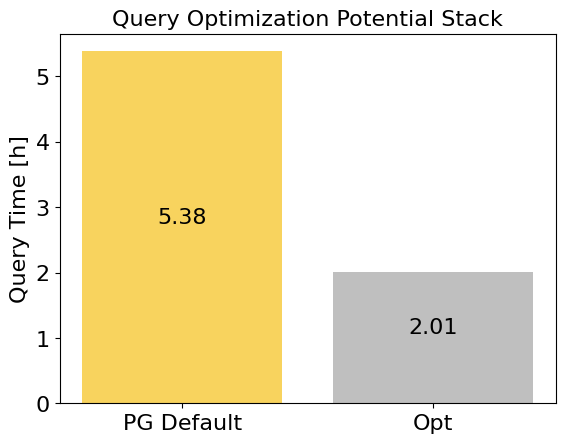

In [22]:
# load archive
from fastgres.analysis_utility.tools.hint_optimization_potential import HintOptimizationPotential
from fastgres.analysis_utility.tool import TimeGranularity as Tg

workload_name = "stack"
version = 12.4
a_path = f"fastgres/archives/{workload_name}/{version}/archive.json"
wl_path = f"fastgres/workloads/queries/{workload_name}/"

stack = HintOptimizationPotential(a_path, wl_path, time_granularity=Tg.SECONDS)
stack.set_properties(title="Query Optimization Potential Stack", ylabel="Query Time")
# stack.save_results(f"figures/optimization_potential/{workload_name}_{version}.pdf")
stack.show()

## JOB

In [4]:
import os
if os.getcwd() != "C:/Users/Jerome/PycharmProjects/FASTgres":
    os.chdir("C:/Users/Jerome/PycharmProjects/FASTgres")

Loading Queries: 113it [00:00, 21016.16it/s]


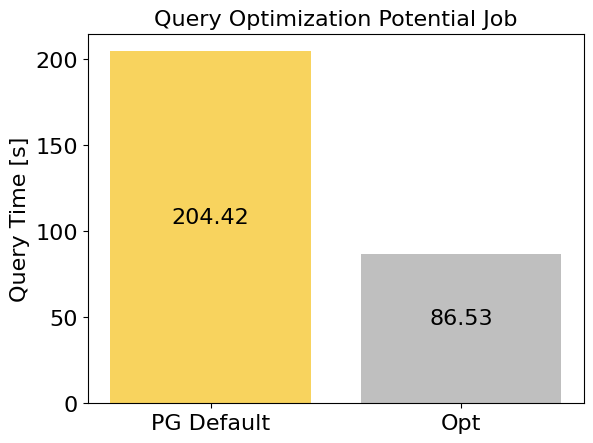

In [5]:
# load archive
from fastgres.analysis_utility.tools.hint_optimization_potential import HintOptimizationPotential
from fastgres.analysis_utility.tool import TimeGranularity as Tg

workload_name = "job"
version = 12.4
a_path = f"fastgres/archives/{workload_name}/{version}/archive.json"
wl_path = f"fastgres/workloads/queries/{workload_name}/"

job = HintOptimizationPotential(a_path, wl_path, time_granularity=Tg.SECONDS)
job.set_properties(title="Query Optimization Potential Job", ylabel="Query Time")
# job.save_results(f"figures/optimization_potential/{workload_name}_{version}.pdf")
job.show()

# Dominant Hint Sets

In [1]:
import os
if os.getcwd() != "C:/Users/Jerome/PycharmProjects/FASTgres":
    os.chdir("C:/Users/Jerome/PycharmProjects/FASTgres")

Loading Queries: 6191it [00:00, 62052.83it/s]


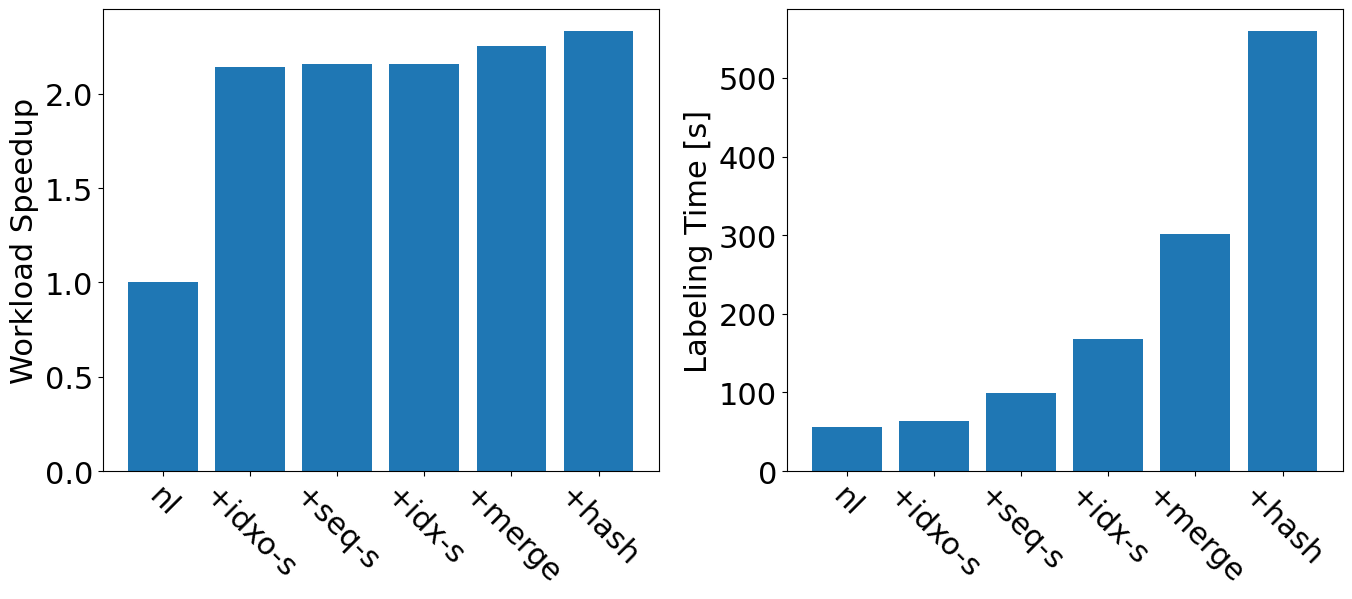

In [22]:
# load archive
from fastgres.analysis_utility.tools.single_hint_optimization_influence import SingleHintOptimizationInfluence
from fastgres.analysis_utility.tool import TimeGranularity as Tg
from workloads.workload import Workload
import random

workload_name = "job"
version = 12.4
a_path = f"fastgres/archives/{workload_name}/{version}/archive.json"
wl_path = f"fastgres/workloads/queries/{workload_name}/"

workload = Workload(wl_path, workload_name)
test_queries = workload.queries
# random.shuffle(test_queries)
test_queries = test_queries[:10]
# nl, idxs, seqs, idxos, merge, hash
hint_set_order = [32, 16, 8, 4, 2, 1]
random.shuffle(hint_set_order)

job = SingleHintOptimizationInfluence(a_path, wl_path, test_queries, hint_set_order, time_granularity=Tg.SECONDS)
job.set_properties(ylabel_left="Workload Speedup", ylabel_right="Labeling Time")
# job.save_results(f"figures/single_hint_potential/{workload_name}_{version}.pdf")
job.show()

In [11]:
from fastgres.baseline.database_connection import DatabaseConnection
from time import time

dbc = DatabaseConnection("dbname=imdb user=postgres password=postgres host=localhost port=5432", "imdb")
con, cur = dbc.establish_connection()

q1 = "SELECT MIN(mc.note) AS production_note, MIN(t.title) AS movie_title, MIN(t.production_year) AS movie_year FROM company_type AS ct, info_type AS it, movie_companies AS mc, movie_info_idx AS mi_idx, title AS t WHERE ct.kind = 'production companies' AND it.info = 'top 250 rank' AND mc.note NOT LIKE '%(as Metro-Goldwyn-Mayer Pictures)%' AND (mc.note LIKE '%(co-production)%' OR mc.note LIKE '%(presents)%') AND ct.id = mc.company_type_id AND t.id = mc.movie_id AND t.id = mi_idx.movie_id AND mc.movie_id = mi_idx.movie_id AND it.id = mi_idx.info_type_id;"
q2 = "/*+ Leading(((t (mc ct)) (mi_idx it))) */ " + q1

# cur.execute("SELECT version();")
# res = cur.fetchall()
# print(res)

# t0 = time()
# cur.execute(q1)
# t1 = time()
# 0.369 -> 0.032 warm
# print(t1-t0)
cur.execute("LOAD 'pg_hint_plan';")
t0 = time()
cur.execute(q2)
t1 = time()
print(t1-t0)
# 1.10 -> 0.229 warm

cur.close()
con.close()

1.0032243728637695
